# Chem 30324, Spring 2025, Homework 9


# Due April 11, 2025


## The canonical ensemble.
### The energy spectrum of some molecule is described by the diagram below.  A large number $N$ of these distinguishable molecules is in thermal equilibrium with a much larger reservoir of temperature $T$.

### 1. Write the partition function $q$ for one of the molecules in the system (a) in terms of $T$ and $\varepsilon$, (b) in terms of $\beta = 1/k_B T$ and $\varepsilon$, and (c) in terms of a characteristic temperature $\theta = \varepsilon/k_B$.

$a) q = e^{\frac{0}{k_bT}}+2e^{\frac{-\epsilon}{k_bT}}+3e^{\frac{-2\epsilon}{k_bT}} = 1+2e^{\frac{-\epsilon}{k_bT}}+3e^{\frac{-2\epsilon}{k_bT}}$

$b) q = e^{0\beta}+2e^{-\epsilon\beta}+3e^{-2\epsilon\beta} = 1 +2e^{-\epsilon\beta}+3e^{-2\epsilon\beta}$

$c) q = e^{\frac{0\theta}{T}}+2e^{\frac{-\theta}{T}}+3e^{\frac{-2\theta}{T}} = 1+2e^{\frac{-\theta}{T}}+3e^{\frac{-2\theta}{T}}$

### 2. Plot the relative fractions of molecules of energy 0, $\varepsilon$, and $2\varepsilon$  vs. temperature.  Assume $\theta = 300$ K. Be sure to indicate the probabilities in the limits of $T\rightarrow 0$ and $T \rightarrow \infty$.

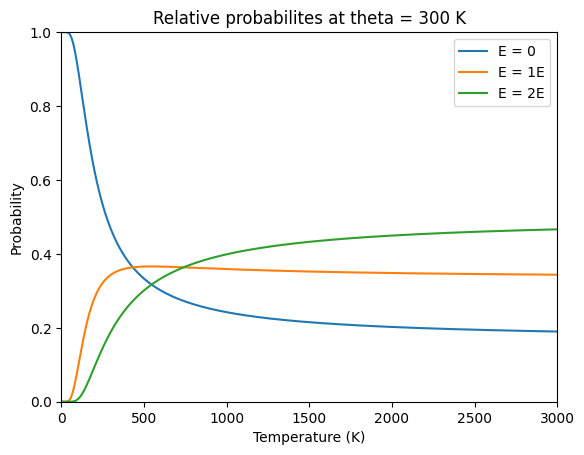

When T --> 0, there is a 100% probability of E = 0. As T --> oo, E = 0 has a 1/6 probability
E = 1E has a 1/3 probability and E = 2E has a 1/2 probability.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

theta = 300 #K
T = np.linspace (1,3000,1000)
Ptot = 1 + 2*np.exp(-theta/T) + 3*np.exp(-2*theta/T)
P0 = 1*np.exp(-0*theta/T)/ Ptot
P1 = 2*np.exp(-theta/T) / Ptot
P2 = 3*np.exp(-2*theta/T) / Ptot

plt.plot(T,P0, label = 'E = 0')
plt.plot(T,P1, label = 'E = 1E')
plt.plot(T,P2, label = 'E = 2E')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Probability')
plt.title('Relative probabilites at theta = 300 K')
plt.ylim(0,1)
plt.xlim(0,3000)

plt.show()
print('When T --> 0, there is a 100% probability of E = 0. As T --> oo, E = 0 has a 1/6 probability')
print('E = 1E has a 1/3 probability and E = 2E has a 1/2 probability.')


### 3. Derive an expression for the internal energy $U$ per molecule by summing over the possible microstates weighted by their probabilities. Plot the average energy vs. temperature, assuming  $\theta =300$ K.

$U = 0P(0) + \varepsilon P(\varepsilon) + 2\varepsilon P(2\varepsilon) = \varepsilon\frac{2e^{-\beta\varepsilon}}{q} + 2\varepsilon\frac{3e^{-2\beta\varepsilon}}{q} = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{q}$

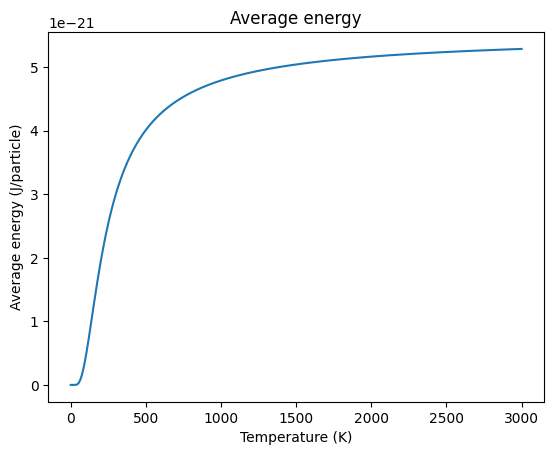

In [4]:
k = 1.380649e-23 #J/K
epsilon = theta*k # as we needed epsilon in expression
U = (2.*epsilon * np.exp(-theta/T) + 6.*epsilon * np.exp(-2.*theta/T))/ Ptot # average energy J per particle
plt.plot(T,U)
plt.xlabel('Temperature (K)')
plt.ylabel('Average energy (J/particle)')
plt.title('Average energy')
plt.show()

### 4. Derive an expression for the internal energy $U$ per molecule by taking the appropriate derivative of the partition function from problem 5 (*Hint:* it is easier to work with the expressions in term of $\beta$ than in $T$.) Does your result agree with that from Question 3?

$\left<U\right> = -\left(\frac{dlnq}{d\beta}\right) = -\frac{1}{q}\left(\frac{dq}{d\beta}\right) = -\frac{1}{q}\frac{d(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})}{d\beta} = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{q}$

Same expression as problem 3.

### 5. Derive an expression for the Helmholtz energy $A$ per molecule from the partition function. Plot $A$ vs. temperature, assuming $\theta
= 300$ K.

$A = U - TS = U - T(\frac{U}{T}+k_B\ln q) = -k_BTlnq = -k_BT\ln(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon}) = -k_BT\ln(1 + 2e^{-300/T} + 3e^{-600/T})$

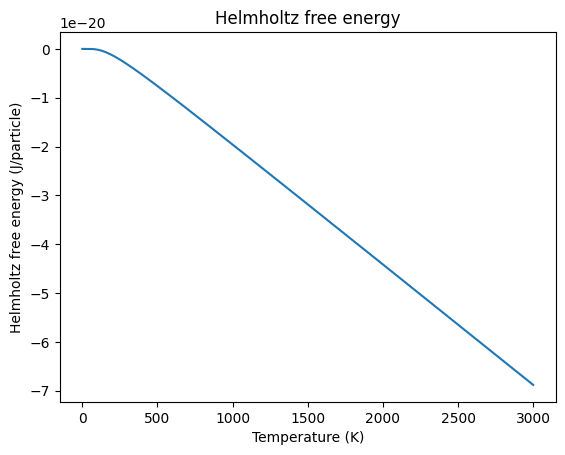

In [5]:
Ptot = 1. + 2.*np.exp(-theta/T) + 3.*np.exp(-2.*theta/T) # partition function
A = -k*T*np.log(Ptot) # J/particle
plt.plot(T,A)
plt.xlabel('Temperature (K)')
plt.ylabel('Helmholtz free energy (J/particle)')
plt.title('Helmholtz free energy')
plt.show()

### 6. Derive an expression for the entropy $S$ per molecules and plot vs. temperature, again assuming $\theta = 300$ K.

$S = \frac{U-A}{T}= \frac{U}{T} + k_B\ln q = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})T} + k_B\ln(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})$

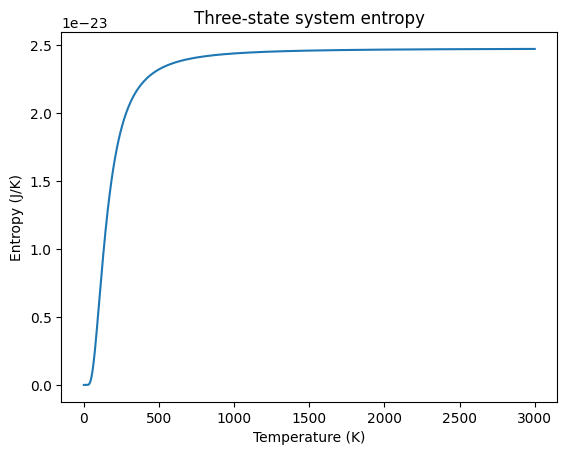

In [6]:
S = (U-A)/T

plt.plot(T,S)
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (J/K)')
plt.title('Three-state system entropy')
plt.show()

### 7. In class we took the First Law as a postulate and demonstrated the Second Law. Look at your results for Problems 2 and 6. Can you use them to rationalize the Third Law? Explain your answer.

Yes. The entropy at absolute zero is equal to zero. From problem 6, we can get when T = 0 K, the molecule has the probability of 1 to be in the 0 energy state. $S(T = 0 K) = k_Bln(1) = 0$. From number 10, we can also get $S \rightarrow 0$ when $T\rightarrow 0$.

## Thermodynamics from scratch.
### Let’s calculate the thermodynamic properties of an ideal gas of CO molecules at 1 bar pressure. CO has a rotational constant $B = 1.931 \text{cm}^{-1}$ and vibrational frequency $\nu = 2156.6 \text{cm}^{-1}$. Suppose you have a 20 dm$^3$ cubic bottle containing 1 mole of CO gas that you can consider to behave ideally.

### 8. The characteristic temperature $\Theta$ of a particular degree of freedom is the characteristic quantum of energy for the degree of freedom divided by $k_B$. Calculate the characteristic translational, rotational, and vibrational temperatures of CO.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

hbar = 1.05457e-34 # J*s
h = 6.62607e-34 # J*s
kB = 1.38065e-23 # J/K
m = 28.01*1.6605e-27 # kg/molecule
V = 0.02 # m^3
c = 2.99792e10 # cm/s
B = 1.931 # cm^-1
v = 2156.6 # cm^-1
T_trans = np.pi**2*hbar**2/2/m/V**(2/3)/kB
T_rot = h*c*B/kB
T_vib = h*c*v/kB
print('Characteristic temperatures of CO:')
print('T_trans = {0:.3e} K, T_rot = {1:.3f} K, T_vib = {2:0.2f} K.'.format(T_trans,T_rot,T_vib))

Characteristic temperatures of CO:
T_trans = 1.160e-18 K, T_rot = 2.778 K, T_vib = 3102.86 K.


### 9. Plot the *translational*, *rotational* and *vibrational* partition functions of a CO molecule in the bottle from $T$ =  200  to 2000 K (assume the CO remains a gas over the whole range). *Hint:* Use your answer to Problem 8 to simplify calculating the rotational partition function.

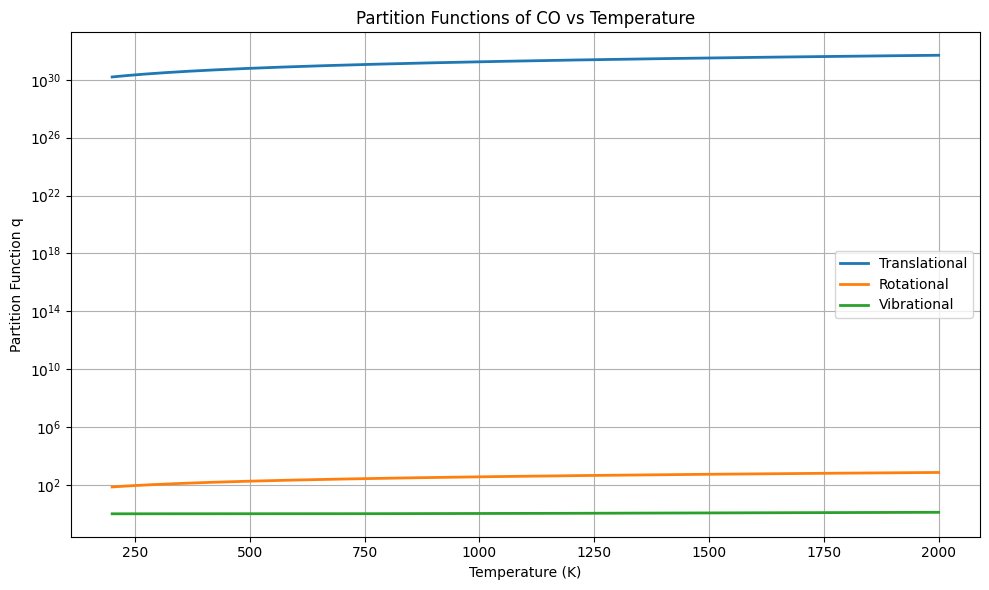

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.62607e-34  # J*s
kB = 1.38065e-23  # J/K
m = 28.01 * 1.6605e-27  # kg for CO
V = 0.02  # m^3

# Characteristic temperatures from Problem 8
Theta_rot = 2.778  # K
Theta_vib = 3102.86  # K

# Temperature range
T = np.linspace(200, 2000, 500)

# Partition functions
q_trans = ((2 * np.pi * m * kB * T) / h**2)**(3/2) * V
q_rot = T / Theta_rot
q_vib = 1 / (1 - np.exp(-Theta_vib / T))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T, q_trans, label='Translational', lw=2)
plt.plot(T, q_rot, label='Rotational', lw=2)
plt.plot(T, q_vib, label='Vibrational', lw=2)
plt.xlabel('Temperature (K)')
plt.ylabel('Partition Function q')
plt.title('Partition Functions of CO vs Temperature')
plt.legend()
plt.grid(True)
plt.yscale('log')  # log scale helps visualize all functions clearly
plt.tight_layout()
plt.show()

### 10. Plot the *total translational, rotational, and vibrational energies* of CO in the bottle from $T =$ 200 to 2000 K (assume the CO remains a gas over the whole range). Which (if any) of the three types of motions dominate the total energy?

$U_{trans} = \frac{3}{2}RT$

 $U_{rot} = RT$

  $U_{vib} = R\frac{\theta_{vib}}{e^{\theta_{vib}/T}-1}$.

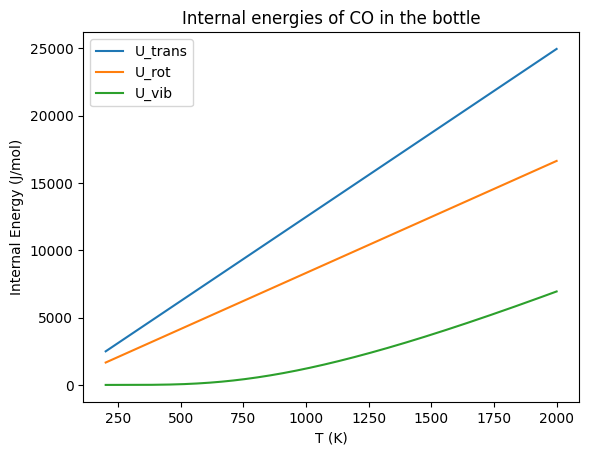

In [14]:
R = 8.31447 # J/(mol*K)
U_trans = 1.5*R*T
U_rot = R*T
U_vib = R*T_vib/(np.exp(T_vib/T)-1)
plt.plot(T,U_trans,label='U_trans')
plt.plot(T,U_rot,label='U_rot')
plt.plot(T,U_vib,label='U_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Internal Energy (J/mol)')
plt.title('Internal energies of CO in the bottle')
plt.show()

### 11. Plot the *total translational, rotational, and vibrational constant volume molar heat capacities* of CO in the bottle from $T =$ 200 to 2000 K. Which (if any) of the three types of motions dominate the heat capacity?

$C_{V,trans} = \frac{3}{2}R$

 $C_{V,rot} = R$

  $C_{V,vib} = R\left(\frac{\theta_{vib}}{T}\frac{e^{\theta_{vib}/2T}}{e^{\theta_{vib}/T}-1}\right)^2$

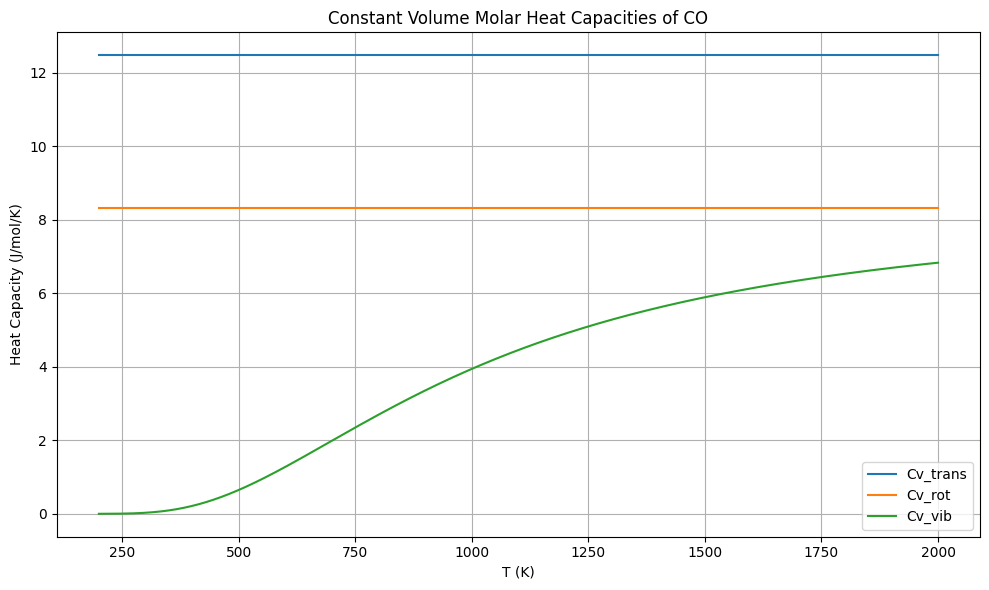

While translational motion contributes the most to the molar heat capacity of CO,
it does not dominate over rotational and vibrational motion at higher temperatures.


In [16]:
# Constants
R = 8.314  # J/mol/K
Theta_vib = 3102.86  # K (from Problem 8)

# Temperature range
T = np.linspace(200, 2000, 1000)

# Heat capacities
Cv_trans = np.full_like(T, 1.5 * R)
Cv_rot = np.full_like(T, R)

x = Theta_vib / T
Cv_vib = R * (x**2 * np.exp(x)) / (np.exp(x) - 1)**2

# Plot
plt.figure(figsize=(10, 6))
plt.plot(T, Cv_trans, label='Cv_trans')
plt.plot(T, Cv_rot, label='Cv_rot')
plt.plot(T, Cv_vib, label='Cv_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Heat Capacity (J/mol/K)')
plt.title('Constant Volume Molar Heat Capacities of CO')
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation
print('While translational motion contributes the most to the molar heat capacity of CO,')
print('it does not dominate over rotational and vibrational motion at higher temperatures.')

### 12. Plot the *total translational, rotational, and vibrational Helmholtz energies* of CO in the bottle from $T =$ 200 to 2000 K. Which (if any) of the three types of motions dominate the Helmholtz energy?


$A = U - TS$

$S_{trans} = Rln\left(\frac{e^{5/2}V}{N\Lambda^3}\right)$

$S_{rot} = R(1-ln(\theta_{rot}/T))$

$S_{vib} = R\left(\frac{\theta_{vib}/T}{e^{\theta_{vib}/T}-1}-ln(1-e^{-\theta_{vib}/T})\right)$.

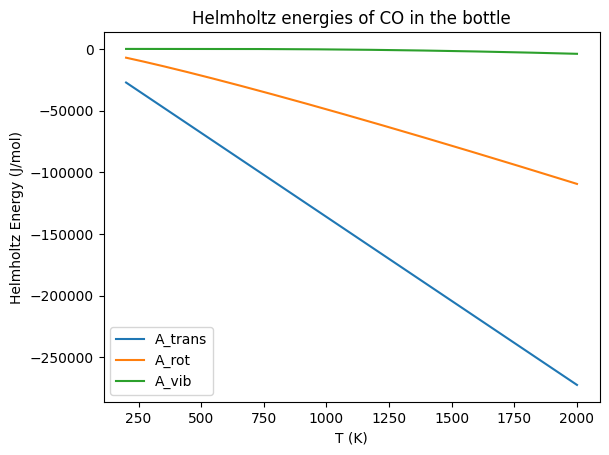

In [ ]:
NA = 6.022e23
Lamda = h*(1/(kB*298*2*np.pi*m))**0.5


S_trans = R*np.log(np.exp(2.5)*V/NA/Lamda**3)
S_rot = R*(1-np.log(T_rot/T))
S_vib = R*(T_vib/T/(np.exp(T_vib/T)-1)-np.log(1-np.exp(-T_vib/T)))
A_trans = U_trans-T*S_trans
A_rot = U_rot-T*S_rot
A_vib = U_vib-T*S_vib
plt.plot(T,A_trans,label='A_trans')
plt.plot(T,A_rot,label='A_rot')
plt.plot(T,A_vib,label='A_vib')
plt.legend()
plt.xlabel('T (K)')
plt.ylabel('Helmholtz Energy (J/mol)')
plt.title('Helmholtz energies of CO in the bottle')
plt.show()

### 13. Use your formulas to calculate $\Delta P$, $\Delta U$, $\Delta A$, and $\Delta S$ associated with isothermally expanding the gas from 20 dm$^3$ to 40 dm$^3$.

T = 298 K. $\Delta U=0$.

$\Delta P = \frac{RT}{V_2} - \frac{RT}{V_1}$.

$\Delta S = S_{trans,2} - S_{trans,1}$.

$A = U-TS$, so, $\Delta A = -T\Delta S$.

In [ ]:
V2 = 0.04 # m^3
deltaP = R*298*(1/V2-1/V)
deltaS = R*np.log(np.exp(2.5)*V2/NA/Lamda**3) - R*np.log(np.exp(2.5)*V/NA/Lamda**3)
deltaA = -deltaS*298
print('Delta P = {0:.3f} Pa, Delta U = 0, Delta A = {1:.3f} J/mol, and Delta S = {2:.3f} J/mol/K.'.format(deltaP,deltaA,deltaS))

Delta P = -61942.801 Pa, Delta U = 0, Delta A = -1717.419 J/mol, and Delta S = 5.763 J/mol/K.
